# Diffusion in Dose Distribution

Dose distribution can be measured in several ways using different dosimetric techniques. One promising technique exploits the use of chemical dosimeters, also known as Fricke gels. A Fricke gel is made from a solution of iron sulfate embedded in a gel matrix. When ionizing radiation interacts with a Fricke gel, ferrous ions ($Fe^{2+}$) are oxidized into ferric ions ($Fe^{3+}$). Exploiting its paramagnetic properties, $Fe^{3+}$ can be mapped using MRI or optical scans, where the measured signals are proportional to the absorbed dose.\
Although their motion is strongly hindered by the gel matrix, $Fe^{3+}$ diffusion cannot be completely suppressed. This results in blurring of the measured distributions, with an amplitude that depends on the time interval between irradiation and measurement. Since MRI or optical scanners are not usually freely available immediately after irradiation, ion diffusion limits the clinical use of Fricke gels.

![image](images/fricke_gel.png)

Physics-Informed Neural Networks can be trained to recover the initial dose distribution, given the diffused distribution and the diffusion coefficient.
To apply this technique, we first need an experimental setup. Let’s start by defining an initial distribution.

In [1]:
# Here we can set our geometry and other parameters
# Suppose we want to work on a rectangular distribution as dipicted in the figure above

# Problem data
Lx=1    #dimension along x
Ly=1    #dimension along y
Tmax=0.5    #final time
D=0.005     #diffusion coefficient
dx=0.01     #space interval along x
dy=0.01     #space interval along y

#initial condition: uniform rectangle free evolved
#centre
xc=0.5
yc=0.5
#rectangle parameters
W=0.3 #widht
H=0.2 #height


#All these parameters can be changed as the user prefers.
#Anyway, it is important keeping in mind that diffusion is affected by scaling laws
#so, by setting opportunately sizes and diffusion coefficient, we can obtain similar time evolutions

## FTCS module

The [FTCS module](./FTCS) is a Python implementation of the Forward in Time, Central in Space (FTCS) scheme for the numerical solution of the diffusion equation in 2D. The `Diffusion2D` class, defined in the [FTCS_scheme file](./FTCS/FTCS_scheme.py), allows the user to set the entire geometry. Additionally, it can be initialized with a stable time step (i.e., a time interval that satisfies the stability condition of the scheme). The module provides many functions, which the reader is encouraged to explore.

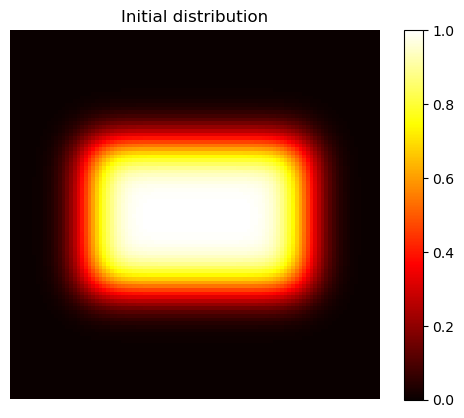

In [2]:
#Lets visulize the initial condition
from FTCS.FTCS_scheme import diffusion_2D
from FTCS.Initial_condition import rectangle
import matplotlib.pylab as plt

geo=diffusion_2D(Lx,Ly,Tmax,dx,dy,D) #set geometry and other parameters

ini=rectangle(geo,xc,yc,H,W,T_evo=0.3) #this function creates a rectangular initial condition
                                       #smoothly evolved for a time T_evo and centered in (xc,yc)
geo.set_initial_condition(ini) #ini is set as initial condition of the problem

plt.title('Initial distribution')
plt.imshow(ini, 'hot', vmax=1,vmin=0)
plt.axis('off')
plt.colorbar()
plt.show()

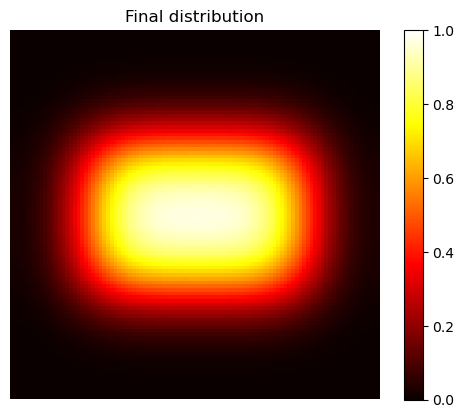

In [3]:
#we can let evolve the distribution using the  Neumann_evo function
#calling it without arguments, the function will evolve the distribution until Tmax
final = geo.Neumann_evo()

plt.title('Final distribution')
plt.imshow(final, 'hot', vmax=1,vmin=0)
plt.axis('off')
plt.colorbar()
plt.show()

## Conclusions
This simple notebook reproduces the most basic physical processes that occur in a Fricke gel after irradiation. In reality, diffusion in Fricke gels can be much more complex. For instance, adding a chelating agent—used to enable dose measurements through absorbance—induces an auto-oxidation process.

The [FTCS module](./FTCS/FTCS_scheme.ipynb) also includes diffusion with a source term. Try using it!


Most importantly, save both a diffused and an initial distribution to train and test a PINN model!